## [QQ Plot - 정규성/왜도/첨도 체크]

- 정규분포 가정이 필요한 모델에서 필수:
    * 선형회귀(OLS), : 잔차가 정규인지 확인
    * ANOVA, t-test : 데이터가 정규성
    * Box-Cox 변환 필요 여부 판단
    * 치우침 개선 전-후 비교
    * 이상치(Outlier) 탐지
    
- 무슨 변환을 해야 하는지 방향성도 잡아줌


In [8]:
## 모듈로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox, yeojohnson              ## 왜도/첨도 변환 함수
from scipy.stats import probplot, skew, kurtosis        ## QQ plot 그려주는 함수


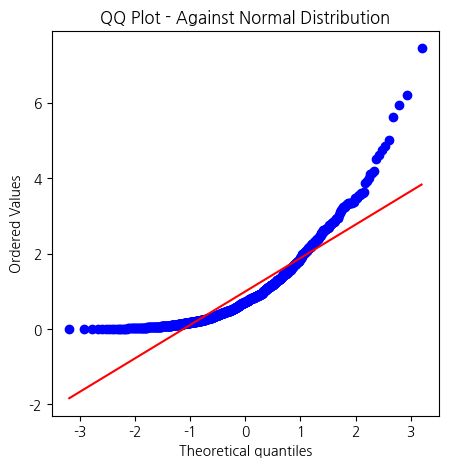

In [9]:
## 임시데이터 - 왼쪽 솔린 데이터
x = np.random.exponential(size=1000)

plt.figure(figsize=(5,5))

## qqplot
probplot(x, dist="norm", plot=plt)

plt.title("QQ Plot - Against Normal Distribution")
plt.show()

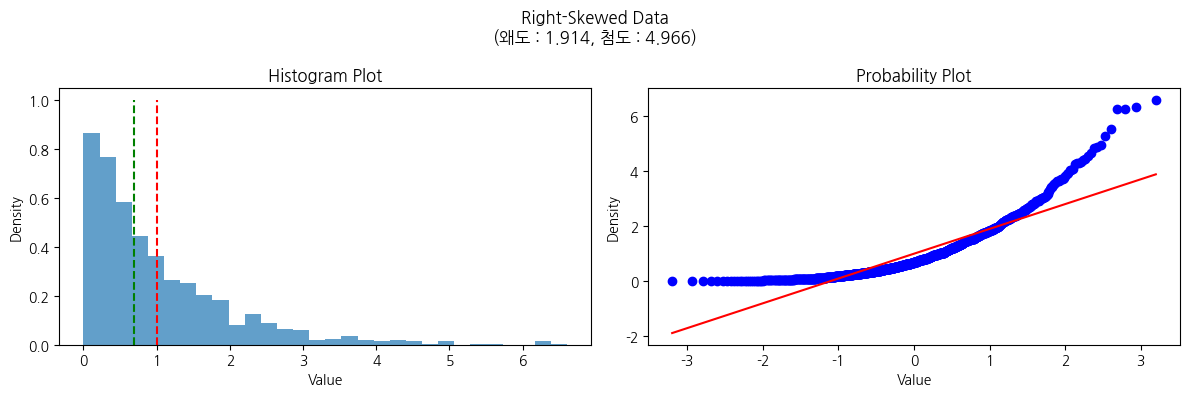

In [23]:
## --------------------------------------------------------------
## 임시데이터 - 왼쪽 쏠린 데이터
## --------------------------------------------------------------
x = np.random.exponential(size=1000)
x_maen = np.mean(x)
x_median = np.median(x)
x_skew = skew(x, bias=True)
x_ku = ku = kurtosis(x, fisher=True, bias=False)

## --------------------------------------------------------------
## 데이터 분포 시각화 - 히스토그램
## --------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

## 데이터 히스토그램
axes[0].hist(x, bins=30, density=True, alpha=0.7)
axes[0].vlines(x_maen, 0, 1, color = 'r', linestyle='dashed')
axes[0].vlines(x_median, 0, 1, color = 'g', linestyle='dashed')
axes[0].set_title('Histogram Plot')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

## 데이터 QQ 그래프
probplot(x, dist="norm", plot=axes[1])
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

plt.suptitle(f"Right-Skewed Data\n(왜도 : {x_skew:.3f}, 첨도 : {x_ku:.3f})")
plt.tight_layout()
plt.show()

In [34]:
## --------------------------------------------------------------
## 데이터의 기술 통계랑 출력
## --------------------------------------------------------------
def print_stats(x, label="data"):
    """간단 통계랑 + 왜도/첨도 출력 함수"""
    s = pd.Series(x)
    print(f"== {label} ==")
    print(f"   개수   : {len(s)}")
    print(f"   평균   : {s.mean():.3f}")
    print(f"  중앙값   : {s.median():.3f}")
    print(f"  표준편차 : {s.std():.3f}")
    print(f"   왜도   : {skew(s, bias=True):.3f}")
    print(f"   첨도   : {kurtosis(s, fisher=True, bias=False):.3f}")


In [35]:
## --------------------------------------------------------------
## 1. Box-Cox 예제 ( 양수 데이터 ) : 오른쪽 꼬리가 긴 지수분포 데이터 사용
## --------------------------------------------------------------
## 양수 테스트 데이터
np.random.seed(42)
x_pos = np.random.exponential(scale=1.0, size=1000) # > 0

print_stats(x_pos, label="원본 양수 데이터 (Exponential)")

## Box-Cox 변환 (양수만 가능)
x_boxcox, lambda_bc = boxcox(x_pos)     ## lambda 자동 추정
print_stats(x_boxcox, label=f"Box-Cox 변환 데이터 (lambda={lambda_bc:.3f})")


## --------------------------------------------------------------
## 2. Yeo-Johnson 예제 ( 음수 포함 데이터 ) : 평균 0, 양/음 혼합된 치우친 분포 예제로 Laplace 사용
## --------------------------------------------------------------
x_any = np.random.laplace(loc=0.0, scale=1.0, size=1000) # 음수/양수 혼합

print_stats(x_any, label="원본 실수 데이터 (Laplace)")

== 원본 양수 데이터 (Exponential) ==
   개수   : 1000
   평균   : 0.973
  중앙값   : 0.687
  표준편차 : 0.973
   왜도   : 1.865
   첨도   : 5.250
== Box-Cox 변환 데이터 (lambda=0.246) ==
   개수   : 1000
   평균   : -0.411
  중앙값   : -0.359
  표준편차 : 1.022
   왜도   : -0.055
   첨도   : -0.468
== 원본 실수 데이터 (Laplace) ==
   개수   : 1000
   평균   : 0.039
  중앙값   : 0.038
  표준편차 : 1.432
   왜도   : 0.297
   첨도   : 2.016


In [ ]:
## --------------------------------------------------------------
## 2. Yeo-Johnson 
## --------------------------------------------------------------



In [ ]:
## --------------------------------------------------------------
## 3. 시각화 : 히스토그램
## --------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

## (위) Box-Cox 전/후
axes[0, 0].hist(x_pos, bins=30, density=True, alpha=0.7)
axes[0, 0].set_title('원본 양수 데이터 (Exponential) - Histogram')
axes[0, 0].set_xlabel('x_pos')
axes[0, 0].set_ylabel('Density')

axes[0, 1].hist(x_boxcox, bins=30, density=True, alpha=0.7)
axes[0, 1].set_title(f'Box-Cox 변환 (λ={lambda_bc:.2f}) - Histogram')
axes[0, 1].set_xlabel('x_boxcox')
axes[0, 1].set_ylabel('Density')

## (아래) Yeo-Johnson 전/후
axes[1, 0].hist(x_any, bins=30, density=True, alpha=0.7)
axes[1, 0].set_title('원본 실수 데이터 (Laplace) - Histogram')
axes[1, 0].set_xlabel('x_any')
axes[1, 0].set_ylabel('Density')
